# Browser History Analysis

This notebook provides the data analysis of my browsing history.The dataset used in this analysis was downloaded from [Google Takeout](https://takeout.google.com/). 

During this analysis, I have tried to find my browsing patterns.

Tools such as **Numpy**, **Pandas**, **Matplotlib** and **Seaborn** along with Python have been used to give a visual as well as numeric representation of the data in front of us.

## How to run the code

This is an executable Jupyter notebook hosted on [Jovian.ml](https://jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: using free online resources (recommended) or on your own computer.

#### Option 1: Running using free online resources (1-click, recommended)


The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".

#### Option 2: Running on your computer locally


1. Install Conda by [following these instructions](https://jovian.ml/outlink?url=https%3A%2F%2Fconda.io%2Fprojects%2Fconda%2Fen%2Flatest%2Fuser-guide%2Finstall%2Findex.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

`conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade`

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

`jovian clone notebook-owner/notebook-id`

4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

`jupyter notebook`

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.

In [1]:
!pip install jovian pandas matplotlib seaborn tldextract --upgrade --quiet

In [79]:
#Importing the libraries (tools) to be used
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data Preparation and Cleaning

I first loaded the `json` file containg the data using `pd.read_json()`. The url of the file was passed along with the `orient` parameter set as `records`. 

A `json` file in `records` orientation is of the form `[{key:value}, {key:value}...]` i.e. a list of dictionaries.

We'll use the name `raw_df` for the data frame, to indicate that this is unprocessed data that which we might clean, filter and modify to prepare a data frame that's ready for analysis.

In [3]:
url = 'https://raw.githubusercontent.com/itsSrijan/browser-history-analysis/main/BrowserHistory.json'
raw_df = pd.read_json(url, orient='records')

I will now look at random 10 rows using `sample()` method.

In [4]:
raw_df.sample(10)

,page_transition,title,url,client_id,time_usec,favicon_url
6005,LINK,"MI vs RR, 20th Match, Indian Premier League 20...",https://m.cricbuzz.com/cricket-commentary/3041...,ZRHIikiQ/rlUdUAl5FLz3Q==,1602005124191593,NaN
2480,LINK,"DC vs CSK, 34th Match, Indian Premier League 2...",https://m.cricbuzz.com/cricket-commentary/3045...,ZRHIikiQ/rlUdUAl5FLz3Q==,1602948656790245,NaN
22624,AUTO_TOPLEVEL,New tab,chrome-native://newtab/,amA7LPoTRKVeXDePnnoozA==,1594624060306712,NaN
12437,AUTO_BOOKMARK,"Cricket Score, Schedule, Latest News, Stats & ...",https://m.cricbuzz.com/,ZRHIikiQ/rlUdUAl5FLz3Q==,1599245417436439,NaN
5221,LINK,KL Rahul brushes aside concerns over strike-ra...,https://m.cricbuzz.com/cricket-news/114456/kl-...,ZRHIikiQ/rlUdUAl5FLz3Q==,1602215029235360,NaN
23861,LINK,Matlab Online Tutorial - 01 - The User Interfa...,https://www.youtube.com/watch?v=w1cnxqBaljA&li...,LHHWf21uAlb8EBSQurr/Ow==,1581085241466526,https://s.ytimg.com/yts/img/favicon_32-vflOogE...
15719,LINK,Posts - freeCodeCamp.org,https://www.freecodecamp.org/news/ghost/#/posts,amA7LPoTRKVeXDePnnoozA==,1597855126799912,NaN
22461,LINK,freeCodeCamp.org,https://www.freecodecamp.org/news/,amA7LPoTRKVeXDePnnoozA==,1594748633113753,NaN
2504,LINK,"DC vs CSK, 34th Match, Indian Premier League 2...",https://m.cricbuzz.com/cricket-commentary/3045...,ZRHIikiQ/rlUdUAl5FLz3Q==,1602947643731716,NaN
23309,LINK,Google Cloud Computing Foundations Course - Co...,https://swayam.gov.in/nd1_noc20_cs55/preview,LHHWf21uAlb8EBSQurr/Ow==,1581351164462016,https://storage.googleapis.com/swayam2_central...


Since `client_id` and `favicon_url` are not required in the analysis, I'll remove them from `raw_df` using `drop`.

In [5]:
df = raw_df.drop(['client_id', 'favicon_url'], axis = 1)

In [6]:
df.sample(10)

,page_transition,title,url,time_usec
8680,LINK,"RCB vs MI, 10th Match, Indian Premier League 2...",https://m.cricbuzz.com/cricket-commentary/3037...,1601307986882376
9903,LINK,IPL 2020 Telecast Channel: Where to watch and ...,https://www.google.com/amp/s/www.sportskeeda.c...,1600867346325379
20365,RELOAD,"England vs West Indies, 3rd Test | Commentary ...",https://m.cricbuzz.com/cricket-commentary/2905...,1595608133057810
11392,RELOAD,"ENG vs AUS, 2nd ODI, Australia tour of England...",https://m.cricbuzz.com/cricket-commentary/3023...,1600007031598252
11224,LINK,Srijan S | Facebook,https://m.facebook.com/story.php?story_fbid=31...,1600257528739726
23429,AUTO_BOOKMARK,YouTube,https://www.youtube.com/,1581236549405884
12715,AUTO_TOPLEVEL,New tab,chrome-native://newtab/,1599071393262887
3897,LINK,"SRH vs CSK, 29th Match, Indian Premier League ...",https://m.cricbuzz.com/cricket-commentary/3044...,1602598688705629
5172,LINK,"RR vs DC, 23rd Match, Indian Premier League 20...",https://m.cricbuzz.com/cricket-commentary/3042...,1602253422028112
10810,LINK,Shreyas Gopal : T20R,http://bigbashboard.com/player/shreyas-gopal,1600355070114580


In [7]:
# know the no. of rows and columns using shape
df.shape

(24205, 4)

So, the dataset has 756 rows and 18 columns. Let's find the names of those columns.

In [8]:
#Getting the list of columns
df.columns

Index(['page_transition', 'title', 'url', 'time_usec'], dtype='object')

`title` tells about the title/heading of the page visited while `url` column gives the link. `page_transition` describe how the browser navigated to a particular URL on a particular visit. `time_usec` is [epoch time](https://www.epochconverter.com/) in micro seconds. 

In [9]:
#Know about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24205 entries, 0 to 24204
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   page_transition  24205 non-null  object
 1   title            24205 non-null  object
 2   url              24205 non-null  object
 3   time_usec        24205 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 756.5+ KB


We will now extract the information such as domain and sub-domain from `url` column using [tldextract](https://github.com/john-kurkowski/tldextract) library. First, let's import the library.

In [10]:
import tldextract

We will now use the `extract()` method of this library to find domain, sub-domain and suffix.

In [11]:
tldextract.extract(df.url[0])

ExtractResult(subdomain='m', domain='cricbuzz', suffix='com')

It gives a tuple which can be accessed using brackets `[]`.

 We will create a new column `domain` which will contain the domain name for each of the url.

In [12]:
list_of_dict = []
for i in range(0, df.shape[0]):
    temp = tldextract.extract(df.url[i])
    list_of_dict.append(temp[1])
    
df['domain'] = list_of_dict

In [13]:
df

,page_transition,title,url,time_usec,domain
0,LINK,m.cricbuzz.com,https://m.cricbuzz.com/cricket-commentary/3048...,1603557363863443,cricbuzz
1,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,1603556349506567,cricbuzz
2,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,1603556266274298,cricbuzz
3,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,1603556234226181,cricbuzz
4,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,1603556198459496,cricbuzz
...,...,...,...,...,...
24200,LINK,www.blogger.com,https://www.blogger.com/go/report-abuse,1578329924400798,blogger
24201,RELOAD,accounts.google.com,https://accounts.google.com/AccountChooser?Ema...,1578329864388695,google
24202,TYPED,Check Drive,https://checkdrive.blogspot.com/,1578329827313382,blogspot
24203,RELOAD,"Cricket Score, Schedule, Latest News, Stats & ...",https://www.cricbuzz.com/,1578329779681180,cricbuzz


We will now convert the values in `time_usec` column to human-readable time. We will use `pd.to_datetime()` to achieve this. Since the time given here is in micro seconds, the `unit` parameter will take the value `us`. We will finally convert the time zone to `Aisa/Kolkata` from `UTC`.

We will store these converted values in a new column `datetime`.

In [14]:
df['datetime'] = pd.to_datetime(df.time_usec, unit = 'us').dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')

In [15]:
df

,page_transition,title,url,time_usec,domain,datetime
0,LINK,m.cricbuzz.com,https://m.cricbuzz.com/cricket-commentary/3048...,1603557363863443,cricbuzz,2020-10-24 22:06:03.863443+05:30
1,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,1603556349506567,cricbuzz,2020-10-24 21:49:09.506567+05:30
2,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,1603556266274298,cricbuzz,2020-10-24 21:47:46.274298+05:30
3,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,1603556234226181,cricbuzz,2020-10-24 21:47:14.226181+05:30
4,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,1603556198459496,cricbuzz,2020-10-24 21:46:38.459496+05:30
...,...,...,...,...,...,...
24200,LINK,www.blogger.com,https://www.blogger.com/go/report-abuse,1578329924400798,blogger,2020-01-06 22:28:44.400798+05:30
24201,RELOAD,accounts.google.com,https://accounts.google.com/AccountChooser?Ema...,1578329864388695,google,2020-01-06 22:27:44.388695+05:30
24202,TYPED,Check Drive,https://checkdrive.blogspot.com/,1578329827313382,blogspot,2020-01-06 22:27:07.313382+05:30
24203,RELOAD,"Cricket Score, Schedule, Latest News, Stats & ...",https://www.cricbuzz.com/,1578329779681180,cricbuzz,2020-01-06 22:26:19.681180+05:30


Converting epoch time shows us that data is from **1st January, 2020 to 24th October, 2020**.

We can now extract values such as month, name of the day, week of the year and hour from `datetime` column.

We will create a new column for each of the values.

In [16]:
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['dayname'] = pd.DatetimeIndex(df['datetime']).day_name()
df['weekofyear'] = pd.DatetimeIndex(df['datetime']).isocalendar().week.values
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
df['date'] = df['datetime'].dt.date

In [17]:
df

,page_transition,title,url,time_usec,domain,datetime,month,dayname,weekofyear,hour,date
0,LINK,m.cricbuzz.com,https://m.cricbuzz.com/cricket-commentary/3048...,1603557363863443,cricbuzz,2020-10-24 22:06:03.863443+05:30,10,Saturday,43,22,2020-10-24
1,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,1603556349506567,cricbuzz,2020-10-24 21:49:09.506567+05:30,10,Saturday,43,21,2020-10-24
2,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,1603556266274298,cricbuzz,2020-10-24 21:47:46.274298+05:30,10,Saturday,43,21,2020-10-24
3,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,1603556234226181,cricbuzz,2020-10-24 21:47:14.226181+05:30,10,Saturday,43,21,2020-10-24
4,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,1603556198459496,cricbuzz,2020-10-24 21:46:38.459496+05:30,10,Saturday,43,21,2020-10-24
...,...,...,...,...,...,...,...,...,...,...,...
24200,LINK,www.blogger.com,https://www.blogger.com/go/report-abuse,1578329924400798,blogger,2020-01-06 22:28:44.400798+05:30,1,Monday,2,22,2020-01-06
24201,RELOAD,accounts.google.com,https://accounts.google.com/AccountChooser?Ema...,1578329864388695,google,2020-01-06 22:27:44.388695+05:30,1,Monday,2,22,2020-01-06
24202,TYPED,Check Drive,https://checkdrive.blogspot.com/,1578329827313382,blogspot,2020-01-06 22:27:07.313382+05:30,1,Monday,2,22,2020-01-06
24203,RELOAD,"Cricket Score, Schedule, Latest News, Stats & ...",https://www.cricbuzz.com/,1578329779681180,cricbuzz,2020-01-06 22:26:19.681180+05:30,1,Monday,2,22,2020-01-06


We can now remove `time_usec` column using `drop()`.

In [18]:
df.drop('time_usec', axis = 1, inplace = True)

In [19]:
df

,page_transition,title,url,domain,datetime,month,dayname,weekofyear,hour,date
0,LINK,m.cricbuzz.com,https://m.cricbuzz.com/cricket-commentary/3048...,cricbuzz,2020-10-24 22:06:03.863443+05:30,10,Saturday,43,22,2020-10-24
1,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,cricbuzz,2020-10-24 21:49:09.506567+05:30,10,Saturday,43,21,2020-10-24
2,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,cricbuzz,2020-10-24 21:47:46.274298+05:30,10,Saturday,43,21,2020-10-24
3,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,cricbuzz,2020-10-24 21:47:14.226181+05:30,10,Saturday,43,21,2020-10-24
4,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,cricbuzz,2020-10-24 21:46:38.459496+05:30,10,Saturday,43,21,2020-10-24
...,...,...,...,...,...,...,...,...,...,...
24200,LINK,www.blogger.com,https://www.blogger.com/go/report-abuse,blogger,2020-01-06 22:28:44.400798+05:30,1,Monday,2,22,2020-01-06
24201,RELOAD,accounts.google.com,https://accounts.google.com/AccountChooser?Ema...,google,2020-01-06 22:27:44.388695+05:30,1,Monday,2,22,2020-01-06
24202,TYPED,Check Drive,https://checkdrive.blogspot.com/,blogspot,2020-01-06 22:27:07.313382+05:30,1,Monday,2,22,2020-01-06
24203,RELOAD,"Cricket Score, Schedule, Latest News, Stats & ...",https://www.cricbuzz.com/,cricbuzz,2020-01-06 22:26:19.681180+05:30,1,Monday,2,22,2020-01-06


Now, the dataset also contains info when a new tab is opened in Chrome. We do not require this information for our analysis.

We can filter out the rows which have value for `domain` column as `newtab`.

In [20]:
filt1 = (df['domain'] == 'newtab')

In [21]:
df[filt1]

,page_transition,title,url,domain,datetime,month,dayname,weekofyear,hour,date
18,AUTO_TOPLEVEL,New tab,chrome-native://newtab/,newtab,2020-10-24 20:51:42.037260+05:30,10,Saturday,43,20,2020-10-24
27,AUTO_TOPLEVEL,New tab,chrome-native://newtab/,newtab,2020-10-24 20:48:23.104386+05:30,10,Saturday,43,20,2020-10-24
226,AUTO_TOPLEVEL,New tab,chrome-native://newtab/,newtab,2020-10-24 15:36:57.848761+05:30,10,Saturday,43,15,2020-10-24
233,RELOAD,New tab,chrome-native://newtab/,newtab,2020-10-24 15:11:13.911521+05:30,10,Saturday,43,15,2020-10-24
234,AUTO_TOPLEVEL,New tab,chrome-native://newtab/,newtab,2020-10-24 13:49:07.384964+05:30,10,Saturday,43,13,2020-10-24
...,...,...,...,...,...,...,...,...,...,...
24117,AUTO_TOPLEVEL,New Tab,chrome://newtab/,newtab,2020-01-07 12:44:07.897231+05:30,1,Tuesday,2,12,2020-01-07
24165,TYPED,New Tab,chrome://newtab/,newtab,2020-01-07 00:20:19.688717+05:30,1,Tuesday,2,0,2020-01-07
24169,TYPED,New Tab,chrome://newtab/,newtab,2020-01-07 00:08:44.188360+05:30,1,Tuesday,2,0,2020-01-07
24177,TYPED,New Tab,chrome://newtab/,newtab,2020-01-07 00:01:16.788640+05:30,1,Tuesday,2,0,2020-01-07


We will remove these 984 rows.

In [22]:
filt1 = (df['domain'] != 'newtab')
df = df[filt1]
df.reset_index(inplace = True, drop = True)


In [23]:
df

,page_transition,title,url,domain,datetime,month,dayname,weekofyear,hour,date
0,LINK,m.cricbuzz.com,https://m.cricbuzz.com/cricket-commentary/3048...,cricbuzz,2020-10-24 22:06:03.863443+05:30,10,Saturday,43,22,2020-10-24
1,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,cricbuzz,2020-10-24 21:49:09.506567+05:30,10,Saturday,43,21,2020-10-24
2,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,cricbuzz,2020-10-24 21:47:46.274298+05:30,10,Saturday,43,21,2020-10-24
3,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,cricbuzz,2020-10-24 21:47:14.226181+05:30,10,Saturday,43,21,2020-10-24
4,LINK,"KXIP vs SRH, 43rd Match, Indian Premier League...",https://m.cricbuzz.com/cricket-commentary/3048...,cricbuzz,2020-10-24 21:46:38.459496+05:30,10,Saturday,43,21,2020-10-24
...,...,...,...,...,...,...,...,...,...,...
23216,RELOAD,www.blogger.com,https://www.blogger.com/blogger.g?blogID=99447...,blogger,2020-01-06 22:33:27.112226+05:30,1,Monday,2,22,2020-01-06
23217,LINK,www.blogger.com,https://www.blogger.com/go/report-abuse,blogger,2020-01-06 22:28:44.400798+05:30,1,Monday,2,22,2020-01-06
23218,RELOAD,accounts.google.com,https://accounts.google.com/AccountChooser?Ema...,google,2020-01-06 22:27:44.388695+05:30,1,Monday,2,22,2020-01-06
23219,TYPED,Check Drive,https://checkdrive.blogspot.com/,blogspot,2020-01-06 22:27:07.313382+05:30,1,Monday,2,22,2020-01-06


This cleaned  data frame `df` will be usd for our analysis.

## Exploratory Analysis and Visualization

### The Most Visited Websites

To find the most visited websites, we can count the total no. of different values of `domain` column using value_counts(). We wil set the `normalize` parameter of `value_counts()` as `True` to give percentage for each domain.

In [24]:
most_visited_websites = df['domain'].value_counts(normalize = True).head(10) * 100
most_visited_websites

cricbuzz           59.980190
google             12.070970
facebook            3.660480
freecodecamp        3.010206
youtube             2.170449
jovian              1.735498
nitjsr              0.856983
blogger             0.473709
122.252.250.252     0.473709
espncricinfo        0.391887
Name: domain, dtype: float64

We will now plot these using `sns.barplot()`.

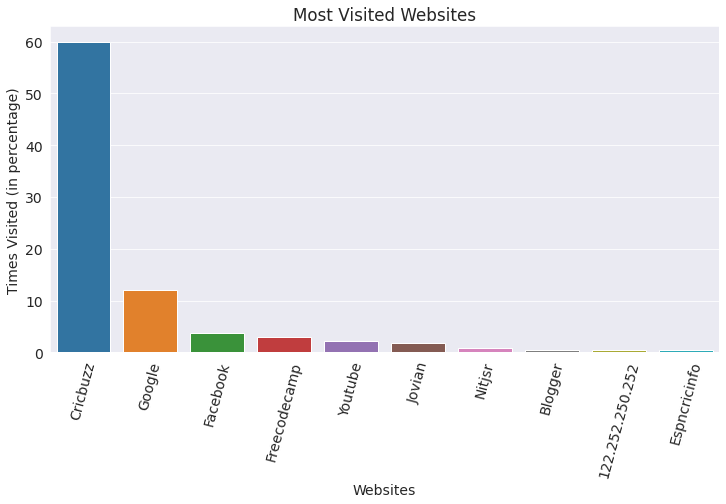

In [80]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 75)
plt.title('Most Visited Websites')
most_visited_sites_plot = sns.barplot(x = most_visited_websites.index.str.capitalize(), y = most_visited_websites)
most_visited_sites_plot.set(xlabel = 'Websites', ylabel = 'Times Visited (in percentage)');

**Cricbuzz**, a cricket website has been visited almost 60% of the time. Google (including other google services) is 2nd most visited at 12%. 

### Busiest Hours

To find the this, we can use `value_counts()` on `hour` column to get the no of times the links are opened at different hours.

In [26]:
busiest_hours = df['hour'].value_counts().sort_index()
busiest_hours

0      782
1      134
2      180
3       41
4       62
5       17
6       30
7      119
8      351
9      499
10     655
11     488
12     627
13     523
14     545
15     971
16    1245
17    1256
18    1156
19    2210
20    2759
21    3252
22    3148
23    2171
Name: hour, dtype: int64

We will now plot this using `plt.plot()`.

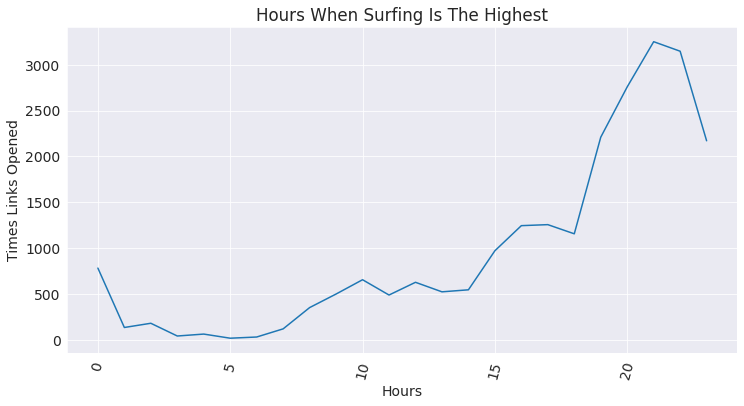

In [81]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 75)
plt.title('Hours When Surfing Is The Highest')
plt.xlabel('Hours')
plt.ylabel('Times Links Opened')
plt.plot(busiest_hours);

Surfing is understandably low between 0:00 hrs and 7:00 hrs. It rises steadily till  14:00 hrs. From 14:00 hrs, there is a continuous rise with a big hike seen from **16:00 hrs**. Surfing is at its highest for **22:00 hrs**.

### Busiest Days

To find the this, we can use `value_counts()` on `dayname` column to get the no. of times the links are opened across different days.

In [28]:
busiest_days = df['dayname'].value_counts()

#Sort the values as per weekdays
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

busiest_days.index = pd.Categorical(busiest_days.index, categories=days, ordered=True)
busiest_days = busiest_days.sort_index()

busiest_days

Monday       2553
Tuesday      2565
Wednesday    3206
Thursday     3120
Friday       3706
Saturday     4208
Sunday       3863
Name: dayname, dtype: int64

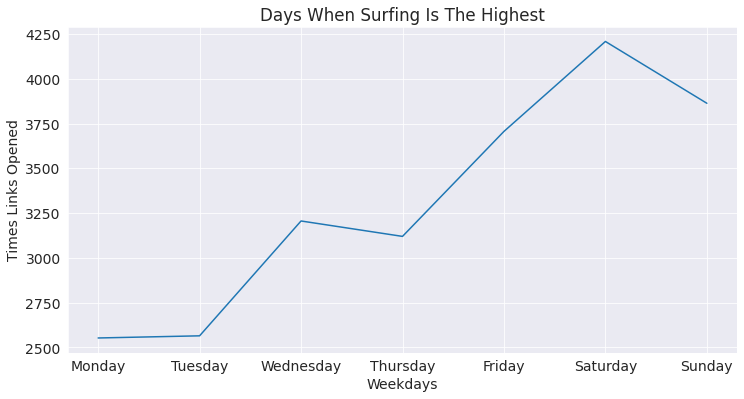

In [82]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 75)
plt.title('Days When Surfing Is The Highest')
plt.xlabel('Weekdays')
plt.ylabel('Times Links Opened')
busiest_days.plot(kind = 'line');

It is quite evident that surfing increases as **weekend** approaches, with it being highest on **Saturday**.

### Variation Across Months

To find the this, we can use` value_counts()` on `month` column to get the no. of times the links are opened across different weeks.

In [30]:
months = df['month'].value_counts().sort_index()
months

1      119
2     1056
7     3626
8     5765
9     4896
10    7759
Name: month, dtype: int64

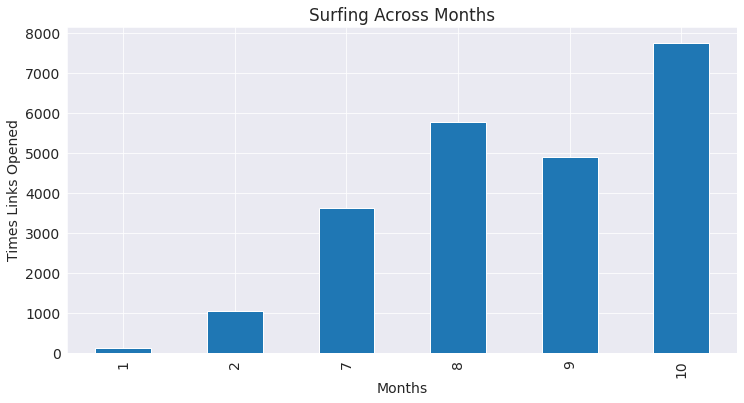

In [83]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 75)
plt.title('Surfing Across Months')
plt.xlabel('Months')
plt.ylabel('Times Links Opened')
months.plot(kind = 'bar');

The plot shows us that ther is no data for months 3 to 6. However, we can conclude that in the past 4 months, surfing has been highest in October.

## Asking and Answering Questions

We now know a lot about our data than when we started. Let's know some more!

### Q. What percentage of sites visited have been secured?

In [32]:
temp = df.url.str.split(':')
temp

0        [https, //m.cricbuzz.com/cricket-commentary/30...
1        [https, //m.cricbuzz.com/cricket-commentary/30...
2        [https, //m.cricbuzz.com/cricket-commentary/30...
3        [https, //m.cricbuzz.com/cricket-commentary/30...
4        [https, //m.cricbuzz.com/cricket-commentary/30...
                               ...                        
23216    [https, //www.blogger.com/blogger.g?blogID=994...
23217           [https, //www.blogger.com/go/report-abuse]
23218    [https, //accounts.google.com/AccountChooser?E...
23219                  [https, //checkdrive.blogspot.com/]
23220                         [https, //www.cricbuzz.com/]
Name: url, Length: 23221, dtype: object

In [33]:
listi = []
for i in range(0, df.shape[0]):
    listi.append(temp[i][0] == 'https')
df['secured'] = listi

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [99]:
x = df.secured.value_counts()
x

True     22429
False      792
Name: secured, dtype: int64

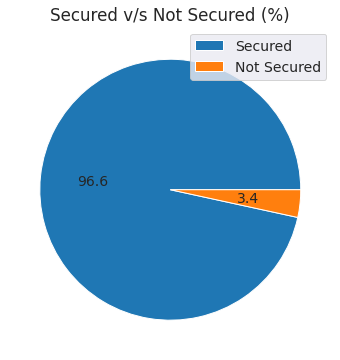

In [110]:
plt.figure(figsize=(12,6))
plt.title('Secured v/s Not Secured (%)')
a = ['Secured', 'Not Secured']
plt.pie(x, autopct = '%.1f', normalize = True)
plt.legend(a, loc = 'upper right');

**97%** of the visited links have been secured.

### Q. Which have been the busiest hours in the last 2 months?

We will create a matrix-like tabulation between different values of hour and dates for which `month >= 9`. Then we will plot them as *heatmap*. 

In [36]:
hourmonth = pd.crosstab(df['hour'], df[df['month'] >= 9]['date'])
hourmonth

date,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,...,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24
hour,,,,,,,,,,,,,,,,,,,,,
0,7,0,13,0,24,3,0,0,0,4,...,2,3,2,13,17,3,0,0,36,0
1,0,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,8
5,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,4,0,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,2,6,19,0
8,0,0,0,10,11,0,0,0,1,1,...,0,0,0,0,0,0,9,6,28,0


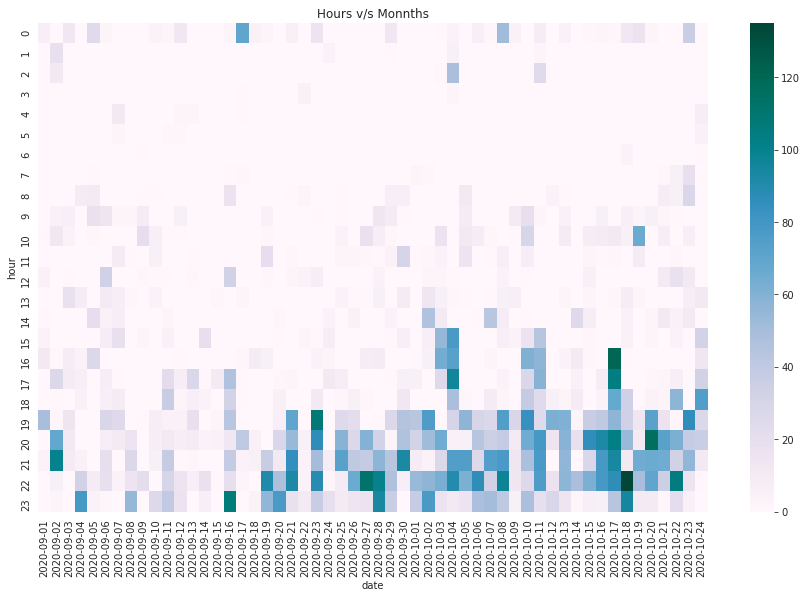

In [37]:
plt.figure(figsize=(15, 9))
plt.xlabel('Date')
plt.ylabel('Hours')
plt.title('Hours v/s Monnths')
sns.heatmap(hourmonth, xticklabels=True, cmap="PuBuGn");

Darker colors indicate more links being opended. Past **14:00 hrs**, things have been busier in the past one month. Between **18:00 hrs and 0:00 hrs**, things are the busiest across past two months.

One thing to note is that for first half of September, there wasn't much chrome usage. This is down to the fact that I had my examinations during those days.

### Q.  How do the usage hours vary across different weekdays since July?

To study this, we can again plot a heatmap between weekdays and different hours.

In [38]:
hourday = pd.crosstab(df['hour'], df[df['month'] >= 7]['dayname'])

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

hourday = hourday.reindex(columns=days)

hourday

dayname,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,49,59,107,163,101,77,33
1,0,4,25,5,5,4,19
2,1,1,14,2,52,7,79
3,6,7,0,1,13,0,10
4,12,0,4,2,0,31,13
5,3,0,0,5,2,7,0
6,0,0,15,4,4,1,6
7,3,0,15,29,46,3,13
8,48,15,86,53,84,34,25


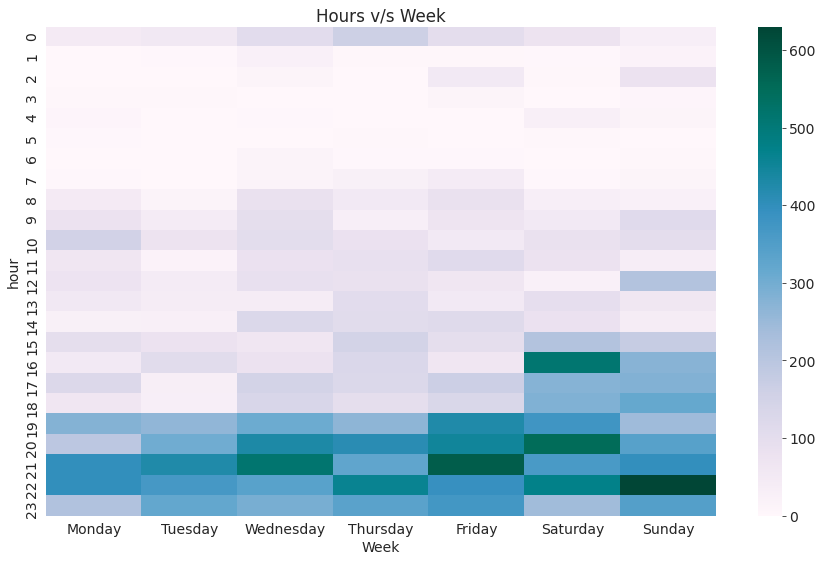

In [155]:
plt.figure(figsize=(15, 9))
plt.xlabel('Week')
plt.ylabel('Hours')
plt.title('Hours v/s Week')
sns.heatmap(hourday, xticklabels=True, cmap="PuBuGn")
plt.xlabel('Week');

For the weekdays, heavy usage starts around **18:00 hrs**. However, during the weekends, heavy usage starts after **14:00 hrs**.

In the first 7 hours, there is minimum usgae. It increases from **7:00 hrs** and remains almost same till evening.

### Q. What is the percentage of websites visited to be sports related?

We first look at the different domains using `unique()` on `domain` column. Then we manually filtered out domains related to sports in a list named `sports`. We then found the the no. of times domains in `sports` have come in `domain` column.

In [55]:
df.domain.unique()

array(['cricbuzz', 'google', 'towardsdatascience', 'realpython',
       'snapdeal', 'freecodecamp', 'harvard', 'goal', 'espncricinfo',
       'provider', 'oreilly', 'java67', 'ldsnitjsr', 'facebook', 'nitjsr',
       'caravanmagazine', 'usyd', 'iitb', 'godaddysites', 'jovian',
       'meetup', 'programiz', 'earthdatascience', 'stackoverflow',
       'pbpython', 'medium', 'datacamp', 'pydata', 'betterdatascience',
       'ketto', 'hindustantimes', 'kdnuggets', 'ndtv', 'wikipedia',
       'fciecoop', 'electoralsearch', 'formula1', 'bankbazaar', 'nvsp',
       'eci', 'psleci', 'india', 'twitter', 'instagram', 'noticebard',
       'telegraphindia', 'udemy', 'worldtimebuddy', '122.252.250.252',
       'boomhacks', 'toppr', 'chegg', 'wisden', 'writingcooperative',
       'indiatoday', 'eventscloud', 'royalenfield', 'news18', '91mobiles',
       'indianexpress', 'irctc', 'mechanicalengineeringbookspdf',
       'paisabazaar', 'onlinesbi', 'researchgate', 'blogionik',
       'my11circle', 'esse

In [121]:
sports = ['cricbuzz', 'goal', 'espncricinfo', 'formula1', 'wisden', 'my11circle', 'essentiallysports', 'espn', 'thesportsrush',
         'cricviz', 'todaynascar', 'sportsanalyticsadvantage', 'cricxtasy', 'cricket', 'whiteballanalytics', 'iplt20', 'bcci',
          'ipl', 'sportingbuzz', 'ipldekho', 'skysports', 'bet365', 'mumbaicricket', 'cricketaddictor', 'efl', 'pcb', 'bein',
       'beinsports', 'planetf1', 'ipltickets', 'insidesport', 'fanfight','bigbashboard', 'nflseasonpass', 'racefans', 
        'redballdata', 'goalkicker', 'football365', 'fantasycult','fantasycult', 'redbull','cricketpakistan', 'sportskeeda',
          'howstat', 'thecricketmonthly', 'changeofpacelive', 'cricketcountry', 'fancode', 'sportsfever360', 'cricingif', 'ecb',
          'icc-cricket','football-talk', 'leedsunited', 'juvefc', 'motogp', 'premierleague', 'formula1-dictionary']

In [137]:
sport = df['domain'].apply(lambda x: x in sports)
sport.value_counts()

True     14410
False     8811
Name: domain, dtype: int64

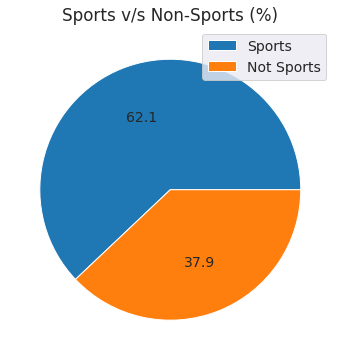

In [138]:
plt.figure(figsize=(12,6))
plt.title('Sports v/s Non-Sports (%)')
a = ['Sports', 'Not Sports']
plt.pie(sport.value_counts(), autopct = '%.1f', normalize = True)
plt.legend(a, loc = 'upper right');

More than **60%** of the links visited are related to sports.

### Q.Among the "non-sports" links, what are the percentages for links visited to related education? What is the same for data science in education?

We first look at the different domains using unique() on `domain `column. Then we manually filtered out domains related to education in a list named `edu`. We then found the the no. of times domains in `edu` have come in domain column.

In [125]:
edu = ['towardsdatascience', 'realpython', 'freecodecamp', 'harvard', 'oreilly', 'java67', 'nitjsr', 'jovian', 'programiz', 
       'earthdatascience', 'stackoverflow', 'pbpython', 'medium', 'datacamp', 'pydata', 'betterdatascience', 'kdnuggets',
       'udemy', 'toppr', 'chegg',  'mechanicalengineeringbookspdf', 'researchgate', 'datastoriesbydg', 'substack', 'stackexchange',
      'easyengineering', 'civildatas', 'academia', 'pdfdrive', 'scikit-learn', 'dataschool', 'algoexpert', 'codedamn',
       'analyticsvidhya', 'analyticsindiamag', 'mheducation', 'springer', 'python', 'kaggle', 'numpy', 'blogspot', 'py4e', 'w3schools',
       'freecoursesite', 'engineeringreads', 'upsc', 'python-gsoc', 'unacademy', 'examrace', 'geekslearning', 'byjus', 
       'lecturenotes', 'nptel',  'tutorialspoint', 'scribd', 'civilengineeringbible', 'geeksforgeeks', 'codepen', 'examclear', 
       'upsconline',  'prepp', 'dev-notes', 'mycodeschool', 'studytonight', 'javatpoint', 'css-tricks', 'askiitians', 
       'brainly', 'vedantu', 'doubtnut', 'chemguide', 'javascript', 'spoj', 'studywebdevelopment', ]

Then we manually filtered out domains related to data science in a list named `ds`. We then found the the no. of times domains in `ds` have come in domain column.

In [127]:
ds = ['towardsdatascience', 'realpython', 'freecodecamp', 'jovian', 'earthdatascience', 'stackoverflow', 'pbpython', 'medium', 
      'datacamp', 'pydata', 'betterdatascience', 'kdnuggets', 'stackexchange' 'scikit-learn', 'dataschool', 'python', 'kaggle',
      'numpy', 'py4e', 'python-gsoc']

In [149]:
notsport = df['domain'].apply(lambda x: x not in sports)

educat = df.loc[notsport]['domain'].apply(lambda x: x in edu)
educat.value_counts().sort_values()

True     2032
False    6779
Name: domain, dtype: int64

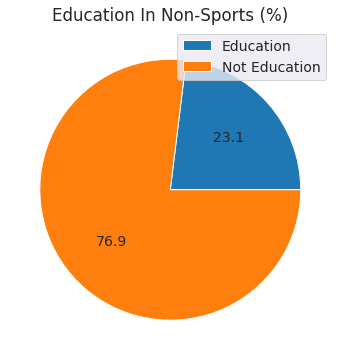

In [151]:
plt.figure(figsize=(12,6))
plt.title('Education In Non-Sports (%)')
a = ['Education', 'Not Education']
plt.pie(educat.value_counts().sort_values(), autopct = '%.1f', normalize = True)
plt.legend(a, loc = 'upper right');

Almost **every 1 in 4 links not related to sports** is related to education.

In [147]:
datasc = df.loc[df['domain'].apply(lambda x: x in edu)]['domain'].apply(lambda x: x in ds)
datasc.value_counts()

True     1262
False     770
Name: domain, dtype: int64

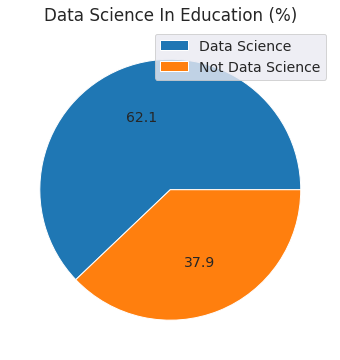

In [154]:
plt.figure(figsize=(12,6))
plt.title('Data Science In Education (%)')
a = ['Data Science', 'Not Data Science']
plt.pie(datasc.value_counts(), autopct = '%.1f', normalize = True)
plt.legend(a, loc = 'upper right');

More than **60%** of the links which are related to education are also related to data science.

## Inferences and Conclusions

We have drawn some interesting inferences and now know more about IPL than we started. Here's a summary of what all we came to know through our analysis:

* Cricbuzz, a cricket website has been visited almost 60% of the time. Google (including other google services) is 2nd most visited at 12%.

* Surfing is understandably low between 0:00 hrs and 7:00 hrs. It rises steadily till 14:00 hrs. From 14:00 hrs, there is a continuous rise with a big hike seen from 16:00 hrs. Surfing is at its highest for 22:00 hrs.

* Surfing increases as weekend approaches, with it being highest on Saturday.

* In the past 4 months, surfing has been highest in October.

* 97% of the visited links have been secured by *https*.

*  Past 14:00 hrs, things have been busier in the past one month. Between 18:00 hrs and 0:00 hrs, things are the busiest across past two months. One thing to note is that for first half of September, there wasn't much chrome usage.

* For the weekdays, heavy usage starts around 18:00 hrs. However, during the weekends, heavy usage starts after 14:00 hrs. In the first 7 hours, there is minimum usgae. It increases from 7:00 hrs and remains almost same till evening.

* More than 60% of the links visited are related to sports.

* Almost every 1 in 4 links not related to sports, is related to education.

* More than 60% of the links which are related to education are also related to data science.

## References

* Kaggle Dataset - https://www.kaggle.com/nowke9/ipldata
* Stack Overflow - https://www.stackoverflow.com
* Matplotlib Documentation -  https://matplotlib.org/3.3.1/users/index.html
* Pandas - https://pandas.pydata.org/docs/user_guide/index.html

And Google!!! If you are stuck anywhere, just put in the search bar. Chances are many other people have been in the same situation as well and have been helped by others. So, just google it.

In [42]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
